<a href="https://colab.research.google.com/github/from0to8/school-of-ai-beijing/blob/master/l_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ai学校，第一课代码，修改网络模型，bs，学习率

1.加载fastai

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


2.其他环境参数

In [0]:
%reload_ext autoreload
%autoreload 2 # 每隔2s自动刷新库
%matplotlib inline # 开启matplotlib嵌入功能，直接显示在笔记内

UsageError: unrecognized arguments: # 开启matplotlib嵌入功能，直接显示在笔记内


3.导入fastai包

In [0]:
from fastai.vision import * # 导入所有子包
from fastai.metrics import error_rate # 评估函数：错误率

4.gpu验证

In [0]:
!nvidia-smi

Wed Jun  5 07:03:59 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    15W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

5.gpu监控工具

In [0]:
!pip install gpustat
!gpustat -cp

  Stored in directory: /root/.cache/pip/wheels/2e/7a/86/ae2c167876a53a7519aed8ae8543455f50825384268e1d7245
Successfully built gpustat
a5cc1f1994c5  Wed Jun  5 07:04:17 2019
[0] Tesla T4         | 39'C,   0 % |    10 / 15079 MB |


设置batchsize

In [0]:
bs=16

数据准备

In [0]:
# URLs包含了很多有用的数据集地址，如mnist
#URLs.MNIST
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
path = untar_data(URLs.PETS) # 解压缩
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls() # 查看当前目录下的文件
#!pwd # 除了调用path子包，还可以加!直接调用linux命令

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

拆分数据和查看数据

In [0]:
path_anno = path/'annotations'
path_img = path/'images'
#!ls $path_img # 显示目录下的图片文件: beagle_194.jpg和beagle_194.mat
!ls $path_img | wc -l # 显示文件数目7393
!ls $path_img | awk -F'.' '{print $2}'|sort|uniq -c
!echo "显示annotation目录内容："
!ls $path_anno

7393
      2 
显示annotation目录内容：
list.txt  README  test.txt  trainval.txt  trimaps  xmls


In [0]:
!wc -l $path_anno/*

   7355 /root/.fastai/data/oxford-iiit-pet/annotations/list.txt
     45 /root/.fastai/data/oxford-iiit-pet/annotations/README
   3669 /root/.fastai/data/oxford-iiit-pet/annotations/test.txt
   3680 /root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt
wc: /root/.fastai/data/oxford-iiit-pet/annotations/trimaps: Is a directory
      0 /root/.fastai/data/oxford-iiit-pet/annotations/trimaps
wc: /root/.fastai/data/oxford-iiit-pet/annotations/xmls: Is a directory
      0 /root/.fastai/data/oxford-iiit-pet/annotations/xmls
  14749 total


In [0]:
!head $path_anno/list.txt

#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images
Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1


In [0]:
!head $path_anno/trainval.txt
!head $path_anno/test.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1
Abyssinian_201 1 1 1
Abyssinian_202 1 1 1
Abyssinian_204 1 1 1
Abyssinian_205 1 1 1
Abyssinian_206 1 1 1
Abyssinian_207 1 1 1
Abyssinian_20 1 1 1
Abyssinian_210 1 1 1
Abyssinian_212 1 1 1
Abyssinian_213 1 1 1


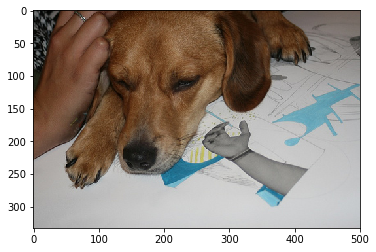

In [0]:
#!ls $path_img | head
from matplotlib import pyplot as plt
from PIL import Image

img_file = '%s/beagle_194.jpg'%(path_img) # 随便选一张图片
plt.imshow(Image.open(img_file))

用fastai读取图象，显示前5张

In [0]:
fnames = get_image_files(path_img) # 将所有文件列表读入列表fnames
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_35.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_49.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_24.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_29.jpg')]

In [0]:
np.random.seed(2) # 固定随机种子，保证每次随机数一样！
pat = r'/([^/]+)_\d+.jpg$' # 正则表达式，只提取jpg文件，剔除mat文件

In [0]:
import numpy as np

np.random.seed(0) # 开启时，每次随机数都一样
np.random.rand(1)

查看猫狗


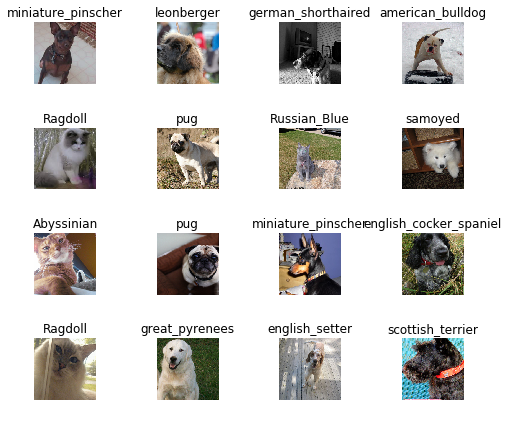

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=8, figsize=(7,6)) # 通过fastai内置方法显示图片

In [0]:
print(data.classes) 
len(data.classes), data.c # 显示不同种类的猫狗数目

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

建立模型，这里参考了已提交的同学的建议用resnet50

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 162027021.82it/s]


显示方法含义与网络结构

In [0]:
# 显示方法含义，后面加问号！结果：Fit a model following the 1cycle policy. 单周期策略的模型训练方法
learn.fit_one_cycle?
learn.model # 显示网络结构

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

训练模型，这里为了提高正确率训练10个周期

In [0]:
learn.fit_one_cycle(10) # 训练10个epoch（周期）

epoch,train_loss,valid_loss,error_rate,time
0,0.677251,0.346201,0.099459,01:36
1,0.588353,0.267932,0.085927,01:34
2,0.477478,0.303791,0.092016,01:35
3,0.468165,0.249817,0.083221,01:35
4,0.311379,0.225661,0.077131,01:35
5,0.321672,0.204916,0.062246,01:35
6,0.252100,0.213255,0.063599,01:34
7,0.230978,0.189484,0.058863,01:34
8,0.173940,0.184141,0.056157,01:35
9,0.156395,0.188746,0.060217,01:35


模型保存

In [0]:
learn.save('stage-50')
#learn.save('/kaggle/working/stage-1') # kaggle专用：将模型保存在工作目录下，commit后可下载

调整学习率

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


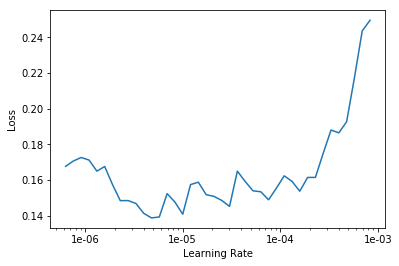

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.157934,0.178156,0.054804,01:37
1,0.157803,0.180419,0.052774,01:38
2,0.152799,0.181037,0.054127,01:38
3,0.115358,0.179367,0.056157,01:38
4,0.117933,0.177719,0.054804,01:38


In [0]:
learn.save('stage-50-1')

采用更深层网络resnet101

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


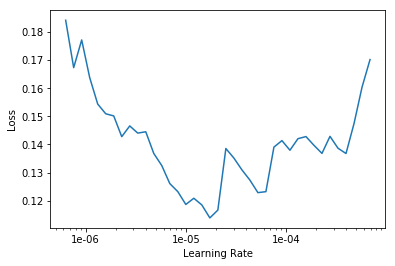

In [34]:
learn.lr_find()
learn.recorder.plot()

In [45]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet101, metrics=error_rate)
learn.fit_one_cycle(5)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,0.606462,0.291474,0.095399,01:44
1,0.562231,0.278847,0.089310,01:45
2,0.369966,0.206496,0.066306,01:45
3,0.263669,0.178912,0.060217,01:45
4,0.218213,0.160283,0.052097,01:45


In [0]:
learn.save('stage-50-2')

在101上修改学习率

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


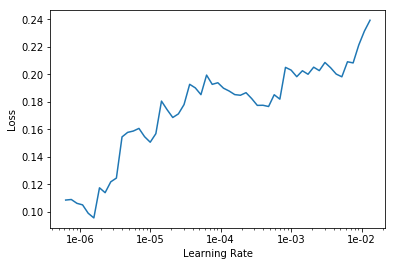

In [48]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.216425,0.158394,0.048038,02:04
1,0.196072,0.160732,0.044655,02:07
2,0.158575,0.155055,0.045332,02:08
3,0.167797,0.155683,0.041949,02:08
4,0.138508,0.150278,0.041949,02:08


In [0]:
learn.save('stage-50-3')